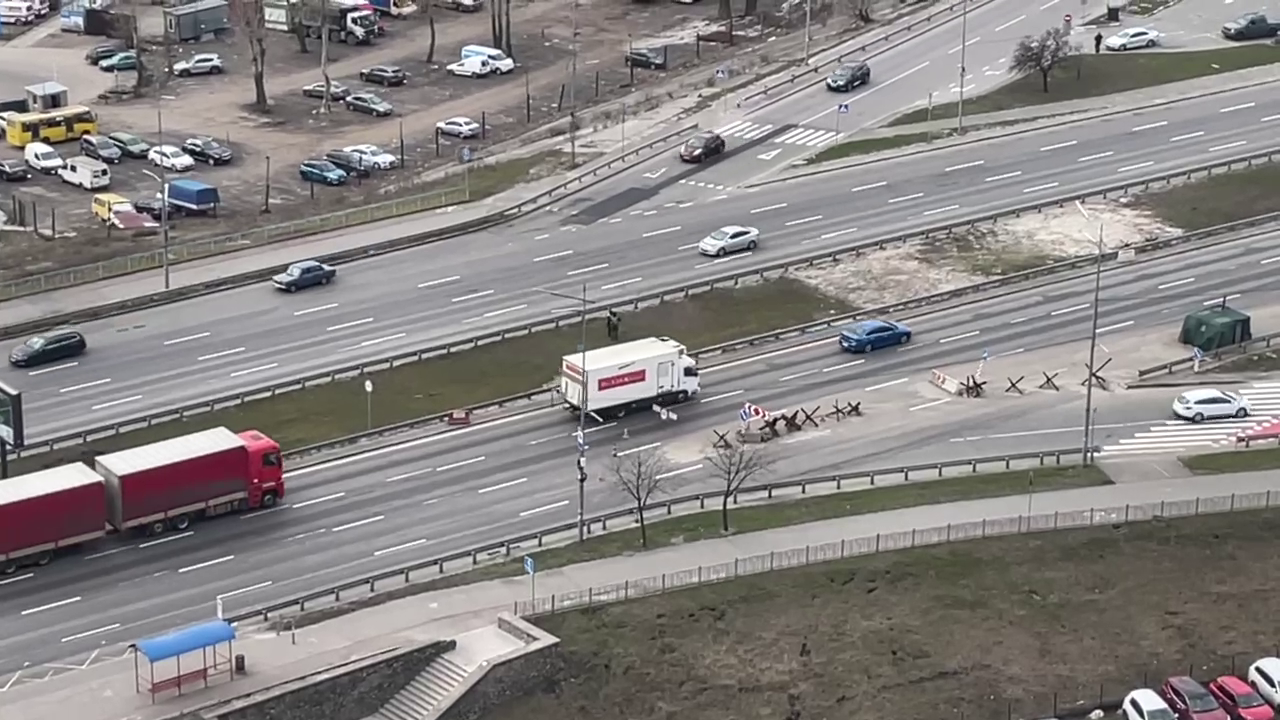

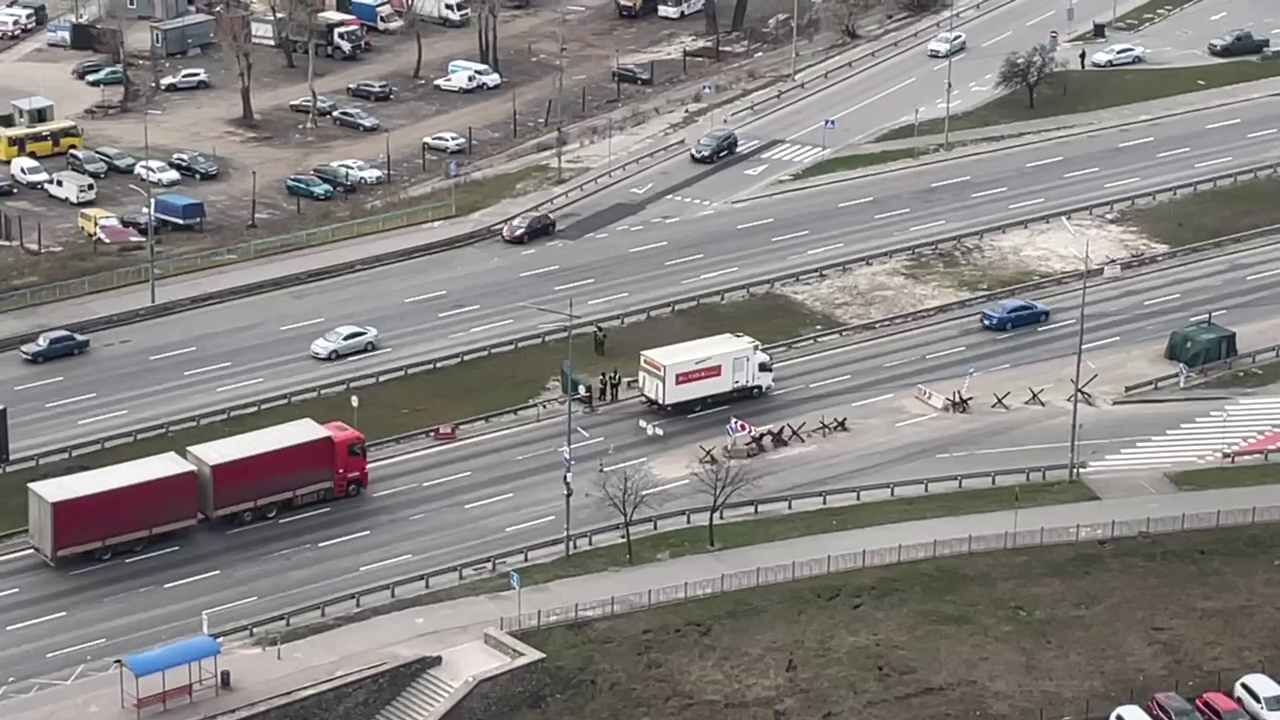

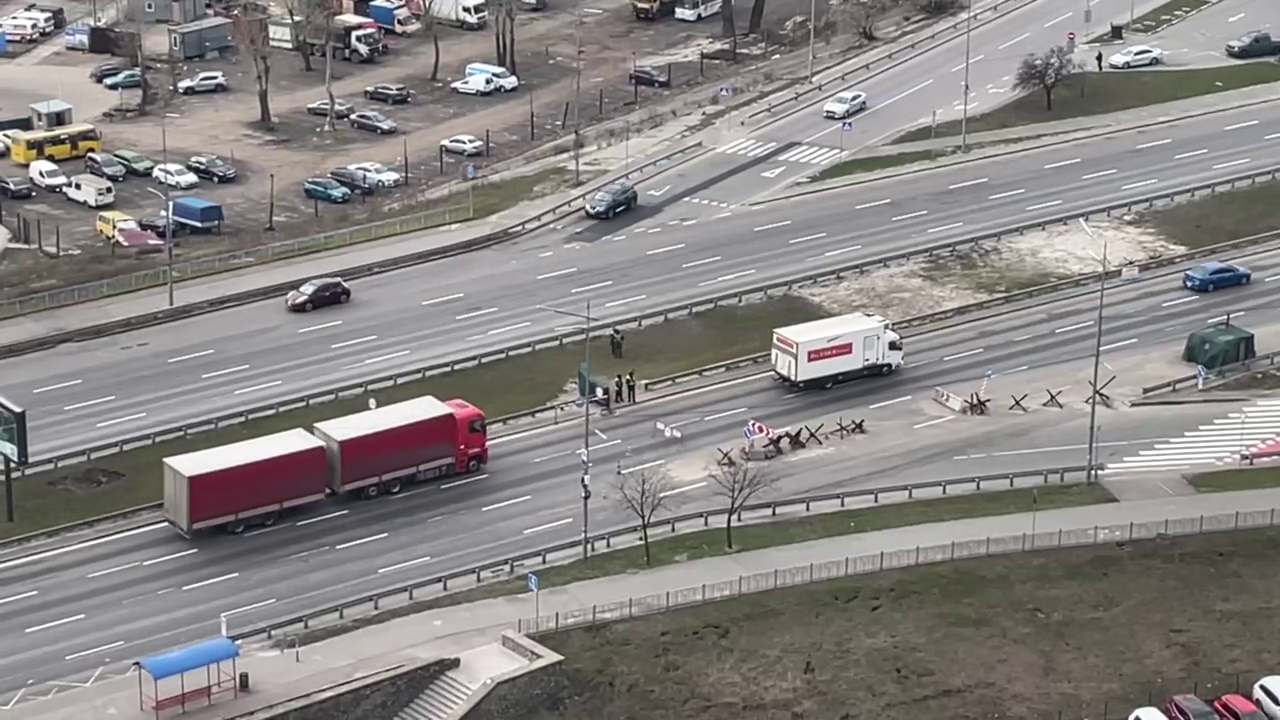

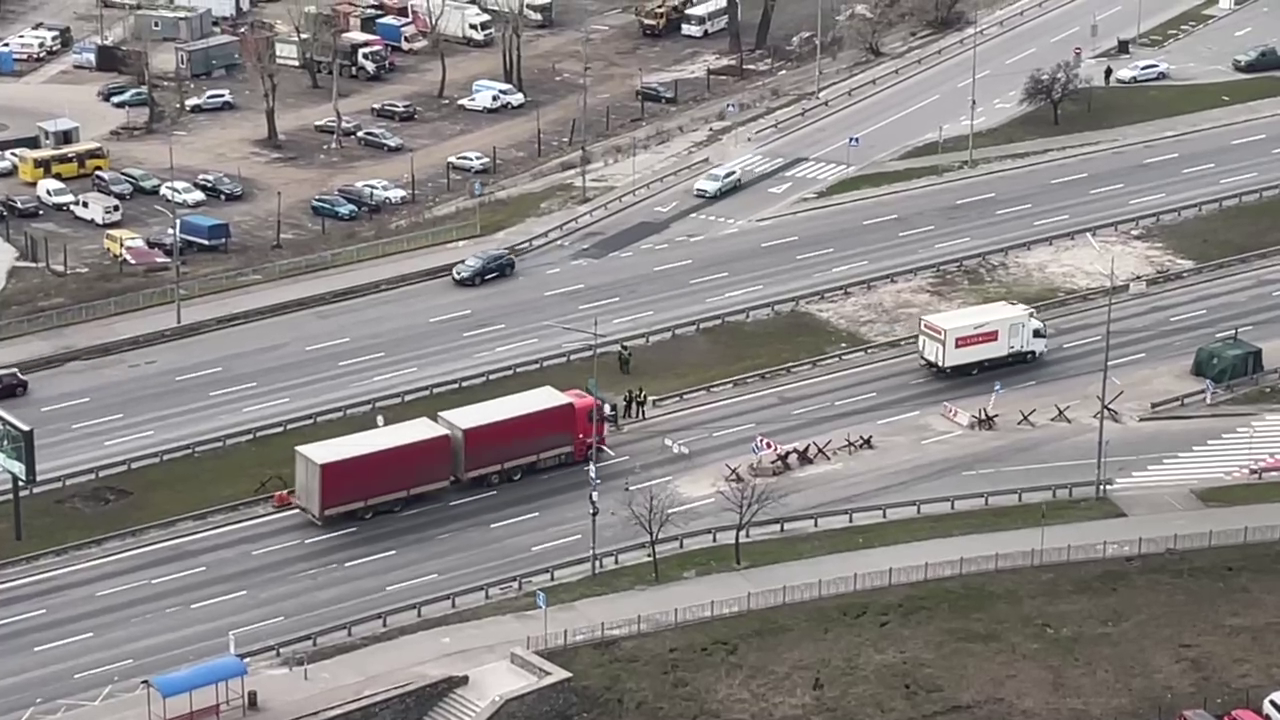

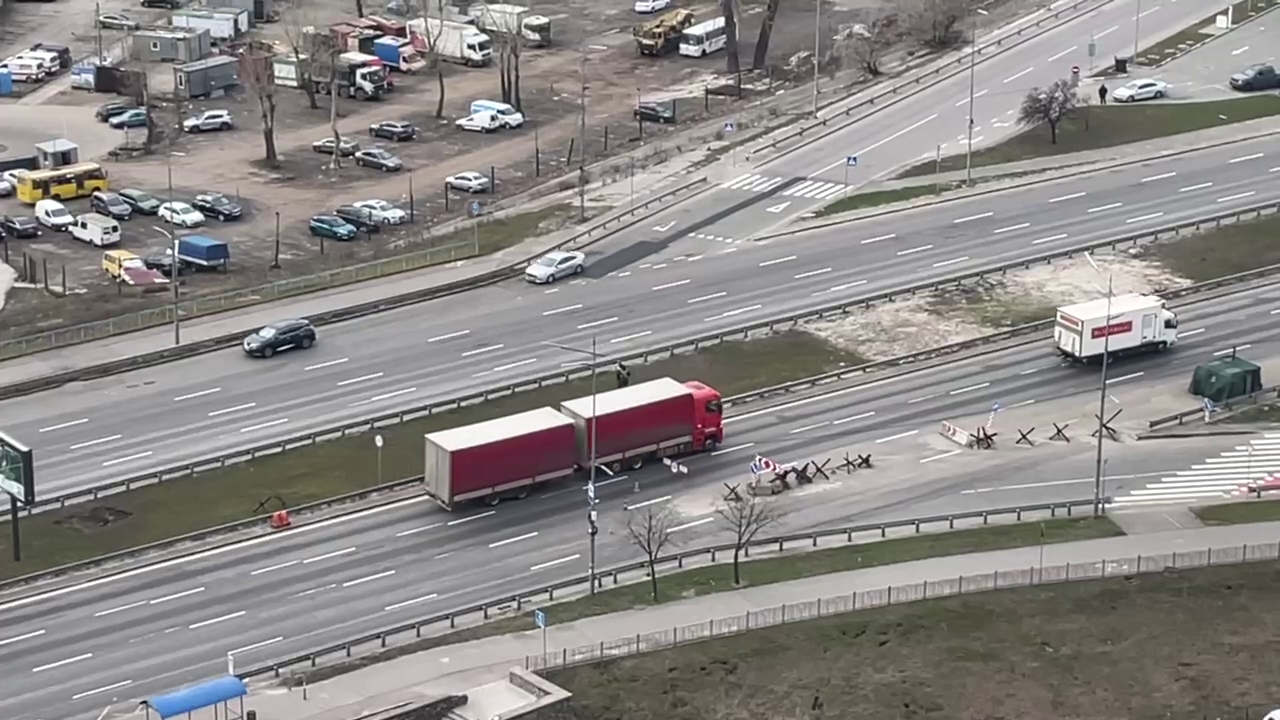

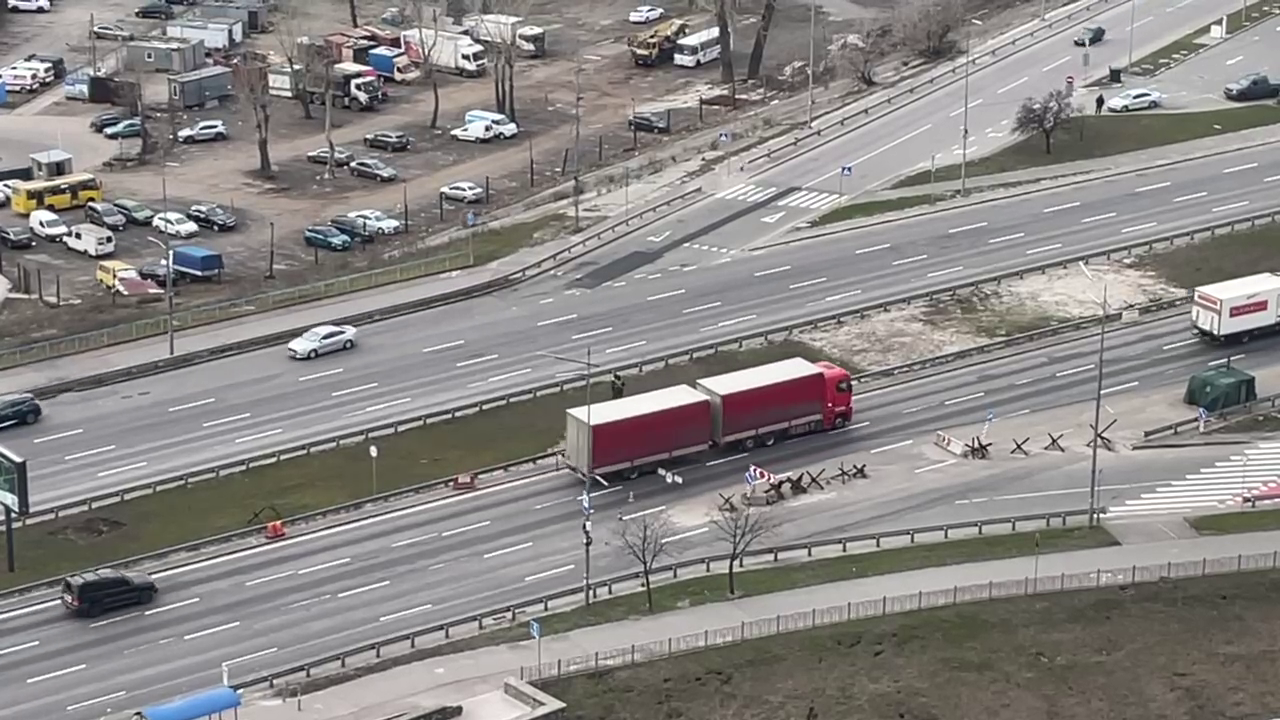

In [2]:
import cv2
from google.colab.patches import cv2_imshow

video = cv2.VideoCapture("003.mp4")

# KCF
tracker = cv2.TrackerKCF_create()

frame_counter = 0
prev_frame = None

while True:
    success, frame = video.read()
    if not success:
        break

    frame_counter += 1

    if frame_counter % 50 == 0:
        # Frame display
        cv2_imshow(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        # Conversion of frame color into shades of gray
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        if prev_frame is not None:
            # Calculation of the difference between the current and previous frame
            frame_diff = cv2.absdiff(gray_frame, prev_frame)

            # Determining the contour of the area with the greatest traffic
            _, thresh = cv2.threshold(frame_diff, 25, 255, cv2.THRESH_BINARY)
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            max_contour = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(max_contour)

            # Update area to track
            bbox = (x, y, w, h)
            tracker.init(frame, bbox)

            # Display the area with the most traffic
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # оновлюємо попередній кадр
        prev_frame = gray_frame

# Release video stream and close windows
video.release()
cv2.destroyAllWindows()





